In [1]:
import pandas as pd
data = pd.read_csv("../res/benchMemoryGraphs.csv", names = ['Sequential', 'Access Type', 'Element Size', 'Working Set Size', 'Time'])
print(data)

      Sequential Access Type  Element Size  Working Set Size    Time
0              1        walk            16              1024   4.377
1              1        walk            16              1097   4.108
2              1        walk            16              1176   4.103
3              1        walk            16              1260   4.137
4              1        walk            16              1351   4.088
5              1        walk            16              1448   4.081
6              1        walk            16              1552   4.048
7              1        walk            16              1663   4.046
8              1        walk            16              1782   4.044
9              1        walk            16              1910   4.038
10             1        walk            16              2047   4.038
11             1        walk            16              2194   4.057
12             1        walk            16              2352   4.054
13             1        walk      

In [2]:
import matplotlib.pyplot as plt

for group in data.groupby(['Sequential', 'Access Type']):
    for graph in group[1].groupby(['Element Size']):
        plt.plot(graph[1]['Working Set Size'], graph[1]['Time'])
        plt.xscale('log', basex=2)
        plt.grid(True)
        plt.ylabel('NanoSeconds/List Element')
        plt.xlabel('Working Set Size')
    plt.legend(('PADDING=1', 'PADDING=3', 'PADDING=7', 'PADDING=15'))
    plt.title(('Sequential' if group[0][0] else 'Random') + ' access with \"' + group[0][1] + '\" pattern')
    plt.savefig(("../res/graphs/graph_" + str(group[0][0]) + '_' + group[0][1]) + "_all", dpi=400)
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

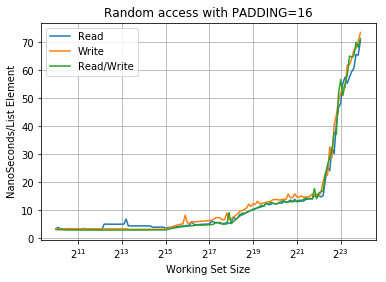

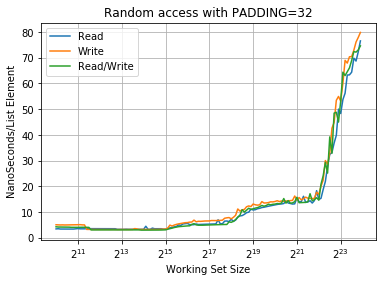

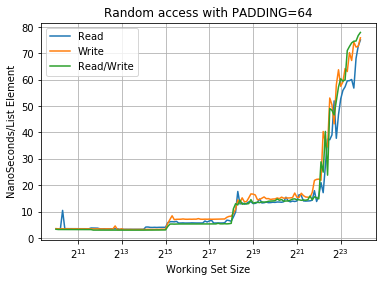

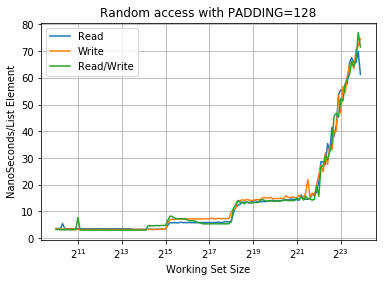

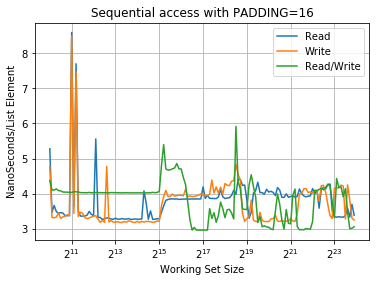

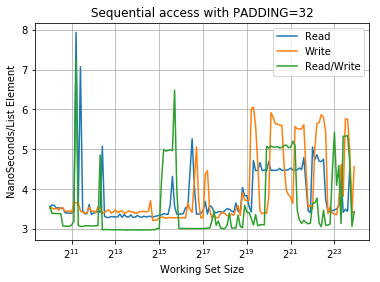

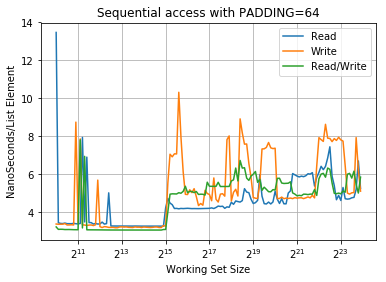

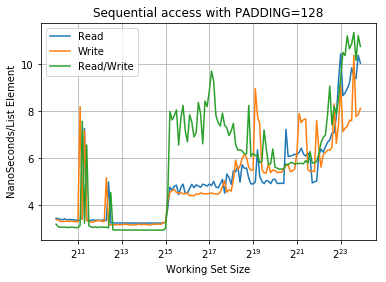

In [3]:
for group in data.groupby(['Sequential', 'Element Size']):
    for graph in group[1].groupby(['Access Type']):
        plt.plot(graph[1]['Working Set Size'], graph[1]['Time'])
        plt.xscale('log', basex=2)
        plt.grid(True)
        plt.ylabel('NanoSeconds/List Element')
        plt.xlabel('Working Set Size')
    plt.legend(('Read', 'Write', 'Read/Write'))
    plt.title(('Sequential' if group[0][0] else 'Random') + ' access with PADDING=' + str(group[0][1]))
    plt.savefig("../res/graphs/graph_" + str(group[0][0]) + '_' + "all_" + str(group[0][1]), dpi=400)
    plt.show()

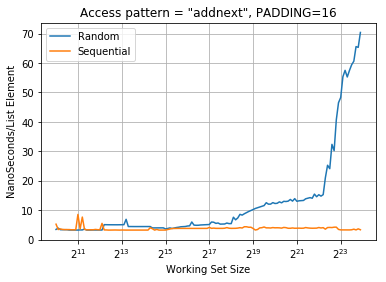

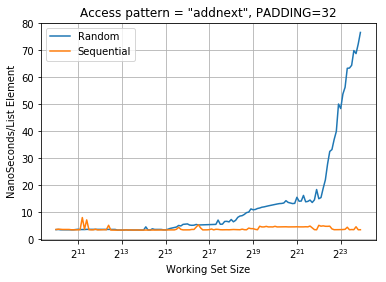

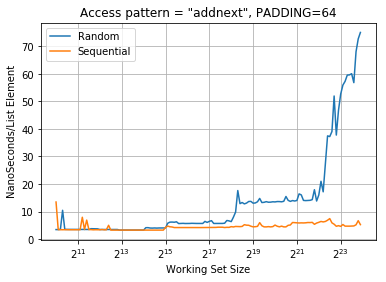

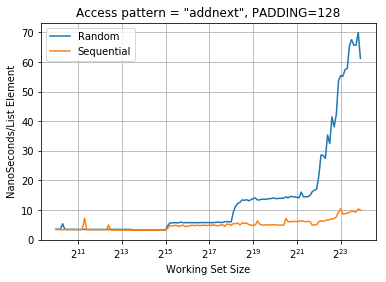

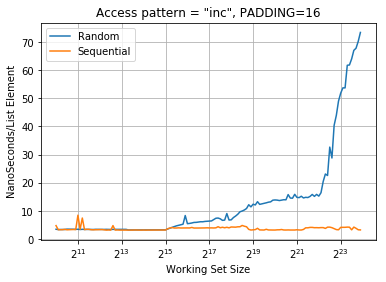

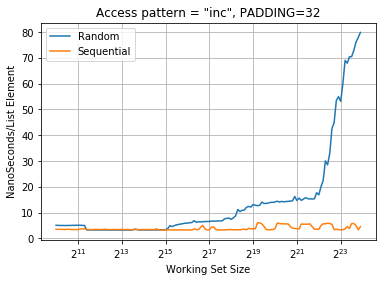

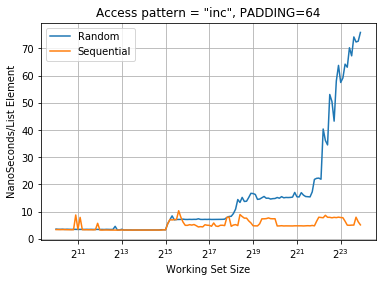

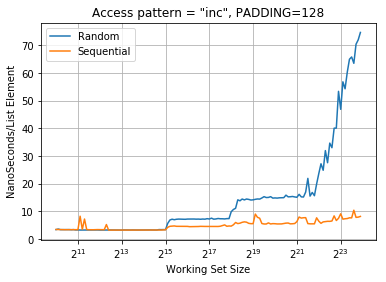

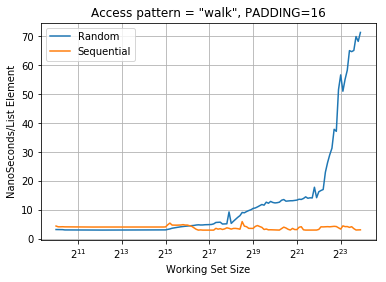

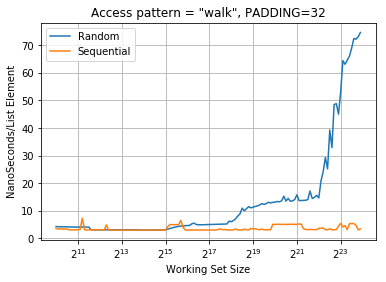

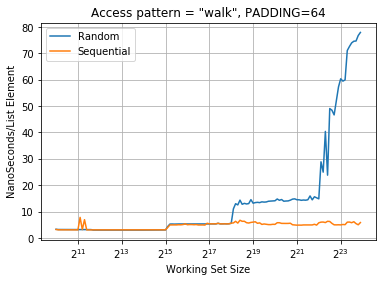

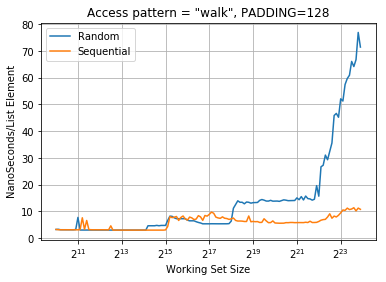

In [4]:
for group in data.groupby(['Access Type', 'Element Size']):
    for graph in group[1].groupby(['Sequential']):
        plt.plot(graph[1]['Working Set Size'], graph[1]['Time'])
        plt.xscale('log', basex=2)
        plt.grid(True)
        plt.ylabel('NanoSeconds/List Element')
        plt.xlabel('Working Set Size')
    plt.legend(('Random', 'Sequential'))
    plt.title('Access pattern = \"' + str(group[0][0]) + '\", PADDING=' + str(group[0][1]))
    plt.savefig("../res/graphs/graph_" + "all_" + group[0][0] + '_' + str(group[0][1]), dpi=400)
    plt.show()